In [1]:
import pandas
import pickle
import datetime
import time
import pytz
import numpy as np

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pandas.set_option('display.max_columns', None)
pandas.set_option('display.max_rows', None)

In [33]:
raw_stats_longs = pandas.read_pickle("../output_tmp/stats_longs.pickle")
raw_stats_shorts = pandas.read_pickle("../output_tmp/stats_shorts.pickle")

# Reduce
stats_longs = raw_stats_longs #[raw_stats_longs['total_return_r'] > 0]
stats_shorts = raw_stats_shorts #[raw_stats_shorts['total_return_r'] > 0]

# Sort
# stats_longs = stats_longs.sort_values(by='kelly_adj_return', ascending=False)
# stats_shorts = stats_shorts.sort_values(by='kelly_adj_return', ascending=False)
# stats_longs = stats_longs.sort_values(by='return_to_dd_ratio_wc', ascending=False)
# stats_shorts = stats_shorts.sort_values(by='return_to_dd_ratio_wc', ascending=False)

print(f'stats_longs: {1-(stats_longs.shape[0] / raw_stats_longs.shape[0]):0.2%} reduction.')
print(f'stats_shorts: {1-(stats_shorts.shape[0] / raw_stats_shorts.shape[0]):0.2%} reduction.')

stats_longs: 0.00% reduction.
stats_shorts: 0.00% reduction.


In [34]:
stats_longs = stats_longs[stats_longs['target_a'] == 0]
stats_longs.shape

(100, 19)

<AxesSubplot:xlabel='target_b', ylabel='total_return_r'>

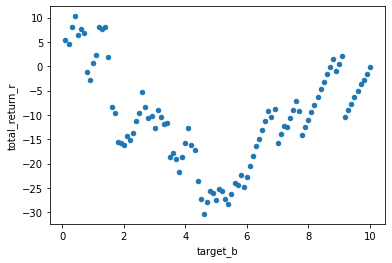

In [32]:
stats_longs.plot.scatter(x='target_b', y='total_return_r')

<AxesSubplot:xlabel='mean_target', ylabel='total_return_r'>

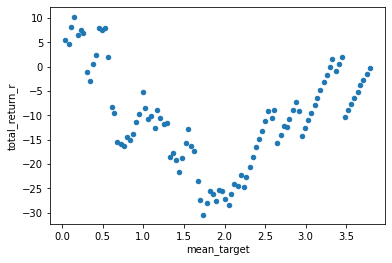

In [38]:
stats_longs.plot.scatter(x='mean_target', y='total_return_r')

<AxesSubplot:xlabel='mean_target', ylabel='return_to_dd_ratio'>

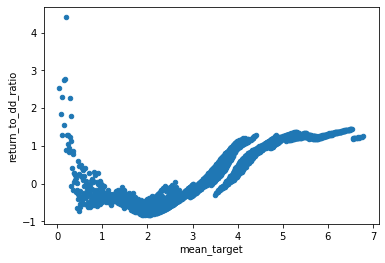

In [7]:
stats_longs.plot.scatter(x='mean_target', y='return_to_dd_ratio')

<AxesSubplot:xlabel='mean_target', ylabel='profit_factor'>

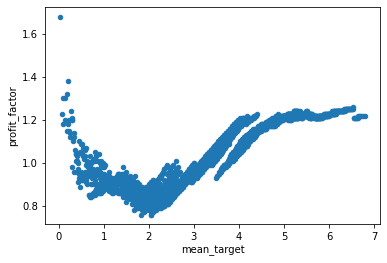

In [8]:
stats_longs.plot.scatter(x='mean_target', y='profit_factor')

<AxesSubplot:xlabel='real_r', ylabel='total_return_r'>

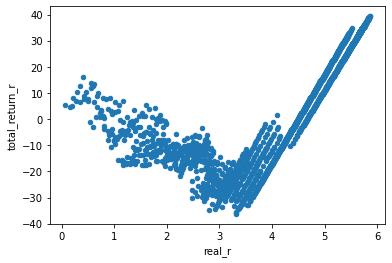

In [9]:
stats_longs.plot.scatter(x='real_r', y='total_return_r')

<AxesSubplot:xlabel='total_return_r', ylabel='return_to_dd_ratio'>

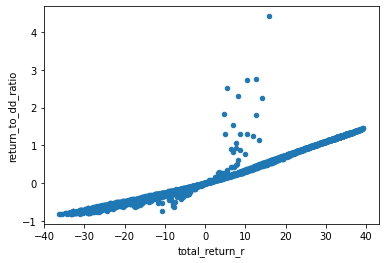

In [16]:
stats_longs.plot.scatter(x='total_return_r', y='return_to_dd_ratio')

In [10]:
stats_longs.head()

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
0,0.75,2.0,0.15,0.5,0.0,0.0,0.1,0.5,0.04,0.07,0.0,187,95.72,5.42,1.68,0.39,2.09,2.14,2.53
1,0.75,2.0,0.15,0.5,0.0,0.0,0.2,0.5,0.08,0.15,0.0,187,89.30,4.60,1.23,0.17,0.77,2.50,1.84
2,0.75,2.0,0.15,0.5,0.0,0.0,0.3,0.5,0.11,0.22,0.0,187,85.56,8.08,1.30,0.20,1.59,3.52,2.30
3,0.75,2.0,0.15,0.5,0.0,0.0,0.4,0.5,0.15,0.29,0.0,187,81.82,10.26,1.30,0.19,1.94,3.74,2.74
4,0.75,2.0,0.15,0.5,0.0,0.0,0.5,0.5,0.19,0.35,0.0,187,76.47,6.52,1.15,0.10,0.64,7.22,0.90


In [13]:
stats_longs['adj_return_to_dd_ratio'] = stats_longs['return_to_dd_ratio'] * stats_longs['kelly']

In [18]:
stats_longs[stats_longs['target_a'] == 0].sort_values(by='return_to_dd_ratio', ascending=False).head(10)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,adj_return_to_dd_ratio
3,0.75,2.0,0.15,0.5,0.0,0.0,0.4,0.5,0.15,0.29,0.0,187,81.82,10.26,1.30,0.19,1.94,3.74,2.74,0.5206
0,0.75,2.0,0.15,0.5,0.0,0.0,0.1,0.5,0.04,0.07,0.0,187,95.72,5.42,1.68,0.39,2.09,2.14,2.53,0.9867
2,0.75,2.0,0.15,0.5,0.0,0.0,0.3,0.5,0.11,0.22,0.0,187,85.56,8.08,1.30,0.20,1.59,3.52,2.30,0.4600
1,0.75,2.0,0.15,0.5,0.0,0.0,0.2,0.5,0.08,0.15,0.0,187,89.30,4.60,1.23,0.17,0.77,2.50,1.84,0.3128
5,0.75,2.0,0.15,0.5,0.0,0.0,0.6,0.5,0.23,0.42,0.0,187,73.26,7.58,1.15,0.10,0.73,7.16,1.06,0.1060
4,0.75,2.0,0.15,0.5,0.0,0.0,0.5,0.5,0.19,0.35,0.0,187,76.47,6.52,1.15,0.10,0.64,7.22,0.90,0.0900
6,0.75,2.0,0.15,0.5,0.0,0.0,0.7,0.5,0.26,0.49,0.0,187,69.52,6.88,1.12,0.07,0.51,8.26,0.83,0.0581
11,0.75,2.0,0.15,0.5,0.0,0.0,1.2,0.5,0.45,0.79,0.0,187,58.29,8.02,1.10,0.05,0.43,13.38,0.60,0.0300
13,0.75,2.0,0.15,0.5,0.0,0.0,1.4,0.5,0.53,0.91,0.0,187,54.55,7.98,1.09,0.05,0.37,16.08,0.50,0.0250
12,0.75,2.0,0.15,0.5,0.0,0.0,1.3,0.5,0.49,0.85,0.0,187,56.15,7.62,1.09,0.05,0.36,16.32,0.47,0.0235


In [22]:
stats_longs[stats_longs['target_a'] == 0].sort_values(by='return_to_dd_ratio', ascending=False).head(10)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,adj_return_to_dd_ratio
3,0.75,2.0,0.15,0.5,0.0,0.0,0.4,0.5,0.15,0.29,0.0,187,81.82,10.26,1.30,0.19,1.94,3.74,2.74,0.5206
0,0.75,2.0,0.15,0.5,0.0,0.0,0.1,0.5,0.04,0.07,0.0,187,95.72,5.42,1.68,0.39,2.09,2.14,2.53,0.9867
2,0.75,2.0,0.15,0.5,0.0,0.0,0.3,0.5,0.11,0.22,0.0,187,85.56,8.08,1.30,0.20,1.59,3.52,2.30,0.4600
1,0.75,2.0,0.15,0.5,0.0,0.0,0.2,0.5,0.08,0.15,0.0,187,89.30,4.60,1.23,0.17,0.77,2.50,1.84,0.3128
5,0.75,2.0,0.15,0.5,0.0,0.0,0.6,0.5,0.23,0.42,0.0,187,73.26,7.58,1.15,0.10,0.73,7.16,1.06,0.1060
4,0.75,2.0,0.15,0.5,0.0,0.0,0.5,0.5,0.19,0.35,0.0,187,76.47,6.52,1.15,0.10,0.64,7.22,0.90,0.0900
6,0.75,2.0,0.15,0.5,0.0,0.0,0.7,0.5,0.26,0.49,0.0,187,69.52,6.88,1.12,0.07,0.51,8.26,0.83,0.0581
11,0.75,2.0,0.15,0.5,0.0,0.0,1.2,0.5,0.45,0.79,0.0,187,58.29,8.02,1.10,0.05,0.43,13.38,0.60,0.0300
13,0.75,2.0,0.15,0.5,0.0,0.0,1.4,0.5,0.53,0.91,0.0,187,54.55,7.98,1.09,0.05,0.37,16.08,0.50,0.0250
12,0.75,2.0,0.15,0.5,0.0,0.0,1.3,0.5,0.49,0.85,0.0,187,56.15,7.62,1.09,0.05,0.36,16.32,0.47,0.0235


In [23]:
stats_longs.sort_values(by='return_to_dd_ratio', ascending=False).head(10)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,adj_return_to_dd_ratio
201,0.75,2.0,0.15,0.5,0.0,0.2,0.0,0.5,0.20,0.40,0.00,187,77.54,15.92,1.38,0.21,3.39,3.60,4.42,0.9282
102,0.75,2.0,0.15,0.5,0.0,0.1,0.2,0.5,0.18,0.35,0.00,187,79.14,12.52,1.32,0.19,2.41,4.52,2.77,0.5263
3,0.75,2.0,0.15,0.5,0.0,0.0,0.4,0.5,0.15,0.29,0.00,187,81.82,10.26,1.30,0.19,1.94,3.74,2.74,0.5206
0,0.75,2.0,0.15,0.5,0.0,0.0,0.1,0.5,0.04,0.07,0.00,187,95.72,5.42,1.68,0.39,2.09,2.14,2.53,0.9867
2,0.75,2.0,0.15,0.5,0.0,0.0,0.3,0.5,0.11,0.22,0.00,187,85.56,8.08,1.30,0.20,1.59,3.52,2.30,0.4600
203,0.75,2.0,0.15,0.5,0.0,0.2,0.2,0.5,0.28,0.55,0.00,187,69.52,13.98,1.24,0.14,1.91,6.18,2.26,0.3164
1,0.75,2.0,0.15,0.5,0.0,0.0,0.2,0.5,0.08,0.15,0.00,187,89.30,4.60,1.23,0.17,0.77,2.50,1.84,0.3128
302,0.75,2.0,0.15,0.5,0.0,0.3,0.0,0.5,0.30,0.60,0.00,187,66.84,12.72,1.20,0.11,1.44,7.08,1.80,0.1980
101,0.75,2.0,0.15,0.5,0.0,0.1,0.1,0.5,0.14,0.28,0.00,187,81.28,6.92,1.20,0.13,0.93,4.50,1.54,0.2002
3024,0.75,2.0,0.15,0.5,0.0,2.9,9.6,0.5,6.54,5.86,16.04,187,17.65,39.28,1.25,0.04,1.41,27.16,1.45,0.0580


In [29]:
display(pandas.DataFrame(stats_longs.loc[102:102]))

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,adj_return_to_dd_ratio
102,0.75,2.0,0.15,0.5,0.0,0.1,0.2,0.5,0.18,0.35,0.0,187,79.14,12.52,1.32,0.19,2.41,4.52,2.77,0.5263


In [30]:
stats_longs.loc[102]

min_distance                0.7500
max_rvol                    2.0000
buffer                      0.1500
stop_a                      0.5000
stop_b                      0.0000
target_a                    0.1000
target_b                    0.2000
mean_stop                   0.5000
mean_target                 0.1800
real_r                      0.3500
time_close_rate             0.0000
hit_count                 187.0000
win_rate                   79.1400
total_return_r             12.5200
profit_factor               1.3200
kelly                       0.1900
kelly_adj_return            2.4100
max_drawdown                4.5200
return_to_dd_ratio          2.7700
adj_return_to_dd_ratio      0.5263
Name: 102, dtype: float64

In [ ]:
stats_longs[stats_longs['target_a'] == 0].sort_values(by='profit_factor', ascending=False).head(10)

In [47]:
stats_longs.shape

(274, 23)

In [48]:
stats_longs.sort_values(by='return_to_dd_ratio', ascending=False).head(200)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,total_return_r_wc,r_std_err,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,return_to_dd_ratio_wc,custom_rank
9365,0.5,2.0,0.15,0.5,0.0,0.2,0.00,0.5,0.20,0.40,0.00,221,75.11,11.32,-6.38,0.04,1.21,0.13,1.45,4.62,2.45,-1.38,-20.51
9316,0.5,2.0,0.15,0.5,0.0,0.0,0.25,0.5,0.09,0.18,0.00,221,87.78,7.44,-4.15,0.03,1.28,0.19,1.41,4.32,1.72,-0.96,-14.29
9317,0.5,2.0,0.15,0.5,0.0,0.0,0.50,0.5,0.18,0.34,0.00,221,76.92,7.38,-9.94,0.04,1.14,0.10,0.71,6.70,1.10,-1.48,-22.05
9390,0.5,2.0,0.15,0.5,0.0,0.3,0.00,0.5,0.30,0.60,0.00,221,64.25,5.84,-16.62,0.05,1.07,0.04,0.26,10.26,0.57,-1.62,-24.08
9341,0.5,2.0,0.15,0.5,0.0,0.1,0.25,0.5,0.19,0.38,0.00,221,74.21,4.92,-12.92,0.04,1.09,0.06,0.29,8.68,0.57,-1.49,-22.13
9340,0.5,2.0,0.15,0.5,0.0,0.1,0.00,0.5,0.10,0.20,0.00,221,84.16,2.14,-10.67,0.03,1.06,0.05,0.10,4.40,0.49,-2.43,-36.06
9342,0.5,2.0,0.15,0.5,0.0,0.1,0.50,0.5,0.28,0.55,0.00,221,66.06,4.76,-17.20,0.05,1.06,0.04,0.19,11.28,0.42,-1.53,-22.67
9320,0.5,2.0,0.15,0.5,0.0,0.0,1.25,0.5,0.46,0.81,0.00,221,56.56,5.02,-23.20,0.07,1.05,0.03,0.14,15.20,0.33,-1.53,-22.69
9369,0.5,2.0,0.15,0.5,0.0,0.2,1.00,0.5,0.57,1.08,0.00,221,48.87,3.86,-27.65,0.07,1.03,0.02,0.06,15.56,0.25,-1.78,-26.42
9366,0.5,2.0,0.15,0.5,0.0,0.2,0.25,0.5,0.29,0.58,0.00,221,64.25,2.86,-19.42,0.05,1.04,0.02,0.06,12.40,0.23,-1.57,-23.28


In [17]:
stats_shorts.sort_values(by='custom_rank', ascending=False).head(10)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,mean_stop,mean_target,real_r,time_close_rate,hit_count,win_rate,total_return_r,total_return_r_wc,r_std_err,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,return_to_dd_ratio_wc,custom_rank
39731,0.5,4.0,0.15,1.0,0.00,0.0,0.50,1.00,0.18,0.19,1.42,211,89.10,11.58,1.32,0.02,1.56,0.32,3.69,3.27,3.54,0.40,5.87
38087,0.5,4.0,0.15,0.9,0.25,0.0,0.50,0.99,0.18,0.19,1.42,211,89.10,11.02,0.82,0.02,1.53,0.31,3.39,3.19,3.45,0.26,3.72
32535,0.5,4.0,0.15,0.6,0.25,0.8,1.00,0.69,1.15,1.66,2.84,211,45.02,41.38,3.77,0.09,1.36,0.12,4.97,19.24,2.15,0.20,2.84
30095,0.5,4.0,0.15,0.4,1.50,0.9,1.25,0.93,1.34,1.47,3.79,211,47.87,37.72,2.55,0.09,1.35,0.12,4.68,17.32,2.18,0.15,2.14
32512,0.5,4.0,0.15,0.6,0.25,0.7,1.50,0.69,1.23,1.75,2.84,211,43.60,41.52,2.49,0.09,1.36,0.11,4.75,18.75,2.21,0.13,1.93
31739,0.5,4.0,0.15,0.5,1.25,0.9,1.25,0.94,1.34,1.43,3.79,211,48.34,36.22,1.84,0.08,1.34,0.12,4.44,15.28,2.37,0.12,1.75
32561,0.5,4.0,0.15,0.6,0.25,0.9,1.25,0.69,1.34,1.89,3.79,211,41.71,42.72,1.95,0.10,1.35,0.11,4.65,17.45,2.45,0.11,1.63
30891,0.5,4.0,0.15,0.5,0.50,0.8,1.00,0.68,1.15,1.69,2.84,211,44.08,38.87,1.02,0.09,1.33,0.11,4.30,18.83,2.06,0.05,0.78
30069,0.5,4.0,0.15,0.4,1.50,0.8,1.00,0.93,1.15,1.29,2.84,211,50.71,33.52,0.98,0.08,1.33,0.13,4.21,19.32,1.73,0.05,0.74
30071,0.5,4.0,0.15,0.4,1.50,0.8,1.50,0.93,1.33,1.45,3.79,211,47.87,35.30,0.60,0.08,1.33,0.12,4.17,17.61,2.00,0.03,0.49


In [7]:
raw_stats_longs = pandas.read_pickle("../output/stats_longs.pickle")
raw_stats_shorts = pandas.read_pickle("../output/stats_shorts.pickle")

# Reduce
stats_longs = raw_stats_longs[raw_stats_longs['total_return_r'] > 0]
stats_shorts = raw_stats_shorts[raw_stats_shorts['total_return_r'] > 0]

stats_longs = raw_stats_longs[raw_stats_longs['max_drawdown'] > 1]
stats_shorts = raw_stats_shorts[raw_stats_shorts['max_drawdown'] > 1]


# Sort
# stats_longs = stats_longs.sort_values(by='kelly_adj_return', ascending=False)
# stats_shorts = stats_shorts.sort_values(by='kelly_adj_return', ascending=False)
stats_longs = stats_longs.sort_values(by='custom_rank', ascending=False)
stats_shorts = stats_shorts.sort_values(by='custom_rank', ascending=False)

print(f'stats_longs: {1-(stats_longs.shape[0] / raw_stats_longs.shape[0]):0.2%} reduction.')
print(f'stats_shorts: {1-(stats_shorts.shape[0] / raw_stats_shorts.shape[0]):0.2%} reduction.')

stats_longs: 0.29% reduction.
stats_shorts: 0.05% reduction.


In [12]:
stats_longs[(stats_longs['profit_factor'] > 2) & (stats_longs['target_r'] >= 0.3)].head(20)

,min_distance,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,total_return_r_wc,r_std_err,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,return_to_dd_ratio_wc,custom_rank
85680,0.50,1.4,0.4,0.3,0.1,0.33,0.32,0.00,169,86.39,24.77,12.96,0.04,2.06,0.44,11.00,2.04,12.14,6.35,82.56
524883,2.00,1.1,0.4,0.3,0.4,1.33,1.25,3.23,31,77.42,23.70,12.78,0.18,4.30,0.59,14.08,1.07,22.15,11.94,66.50
88080,0.50,1.5,0.4,0.3,0.1,0.33,0.32,0.00,178,86.52,26.38,14.30,0.03,2.08,0.45,11.85,2.91,9.07,4.91,65.56
236841,1.00,1.5,0.4,0.2,0.2,1.00,1.00,0.00,112,69.64,43.85,24.65,0.09,2.28,0.39,17.17,4.00,10.96,6.16,65.21
241641,1.00,1.7,0.4,0.2,0.2,1.00,1.00,0.00,128,67.19,43.85,22.91,0.08,2.04,0.34,15.02,4.00,10.96,5.73,64.79
390840,1.50,1.7,0.5,0.2,0.1,0.50,0.50,0.00,67,86.57,20.00,11.73,0.06,3.22,0.60,11.94,1.50,13.33,7.82,64.02
162485,0.75,1.5,0.4,0.3,0.6,2.00,1.93,0.68,147,51.02,74.59,38.66,0.12,2.01,0.26,19.14,7.33,10.18,5.27,63.94
224880,1.00,1.0,0.4,0.3,0.1,0.33,0.32,0.00,54,94.44,13.76,9.25,0.04,5.48,0.77,10.63,1.07,12.86,8.65,63.54
76763,0.50,1.0,0.5,1.0,0.4,0.40,0.44,1.19,84,86.90,19.18,10.97,0.05,2.91,0.57,10.95,1.60,11.99,6.86,62.86
383280,1.50,1.4,0.4,0.3,0.1,0.33,0.32,0.00,68,91.18,14.33,8.09,0.05,3.34,0.64,9.15,1.07,13.39,7.56,62.32


In [9]:
stats_longs[stats_longs['hit_count'] > 75].sort_values(by='return_to_dd_ratio_wc', ascending=False).head(20)

,min_distance,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,total_return_r_wc,r_std_err,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,return_to_dd_ratio_wc,custom_rank
316600,1.25,1.7,0.5,0.6,0.1,0.17,0.33,1.08,93,97.85,14.43,12.07,0.01,14.87,0.91,13.17,1.02,14.15,11.84,114.14
314200,1.25,1.6,0.5,0.6,0.1,0.17,0.33,1.15,87,97.70,13.41,11.05,0.01,13.89,0.91,12.16,1.02,13.15,10.84,101.07
319000,1.25,1.8,0.5,0.6,0.1,0.17,0.25,1.05,95,96.84,13.60,10.33,0.02,7.67,0.84,11.45,1.02,13.33,10.13,98.72
333400,1.25,2.4,0.5,0.6,0.1,0.17,0.22,0.94,106,96.23,14.27,10.27,0.02,5.65,0.79,11.30,1.03,13.85,9.97,102.64
311800,1.25,1.5,0.5,0.6,0.1,0.17,0.33,1.23,81,97.53,12.39,10.03,0.01,12.91,0.90,11.15,1.02,12.15,9.84,88.52
331000,1.25,2.3,0.5,0.6,0.1,0.17,0.22,0.95,105,96.19,14.10,10.10,0.02,5.59,0.79,11.14,1.03,13.69,9.80,100.47
309400,1.25,1.4,0.5,0.6,0.1,0.17,0.33,1.28,78,97.44,11.88,9.52,0.02,12.42,0.90,10.64,1.02,11.65,9.34,82.45
328600,1.25,2.2,0.5,0.6,0.1,0.17,0.22,0.99,101,96.04,13.42,9.42,0.02,5.37,0.78,10.49,1.03,13.03,9.15,91.92
407800,1.50,2.4,0.5,0.6,0.1,0.17,0.32,1.30,77,97.40,11.70,9.32,0.02,12.14,0.89,10.46,1.03,11.36,9.05,79.43
326200,1.25,2.1,0.5,0.6,0.1,0.17,0.22,1.00,100,96.00,13.25,9.25,0.02,5.32,0.78,10.33,1.03,12.86,8.98,89.82


In [140]:
stats_shorts[stats_shorts['hit_count'] > 75].sort_values(by='custom_rank', ascending=False).head(40)

,min_distance,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,total_return_r_wc,r_std_err,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,return_to_dd_ratio_wc,custom_rank
466680,1.75,1.8,0.2,0.8,0.1,0.12,0.13,0.00,77,96.10,6.58,2.75,0.03,3.16,0.66,4.33,1.61,4.09,1.71,14.99
427123,1.50,3.2,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
429523,1.50,3.3,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
419923,1.50,2.9,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
443923,1.50,3.9,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
446323,1.50,4.0,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
431923,1.50,3.4,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
424723,1.50,3.1,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
441523,1.50,3.8,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17
415123,1.50,2.7,0.5,0.9,0.4,0.44,0.48,2.30,87,79.31,13.82,3.50,0.06,1.84,0.36,4.99,2.68,5.16,1.30,12.17


In [108]:
stats_shorts[stats_shorts['hit_count']>=100].head(40)

,min_distance,max_rvol,buffer,stop,target,target_r,real_r,time_close_rate,hit_count,win_rate,total_return_r,total_return_r_wc,r_std_err,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio,return_to_dd_ratio_wc
15179,0.25,1.7,0.1,0.4,1.0,2.50,2.45,2.23,224,37.05,59.30,10.37,0.11,1.42,0.11,6.71,14.10,4.21,0.74
70436,0.50,1.2,0.2,0.8,0.4,0.50,0.52,1.34,149,74.50,19.04,3.59,0.05,1.52,0.26,4.87,5.66,3.36,0.63
71395,0.50,1.2,0.5,0.5,2.7,5.40,4.68,6.35,126,26.98,67.18,8.84,0.24,1.73,0.11,7.66,14.22,4.72,0.62
138398,0.75,1.3,0.4,0.4,2.8,7.00,6.01,4.10,122,22.95,74.84,6.70,0.28,1.79,0.10,7.58,11.23,6.66,0.60
13073,0.25,1.6,0.1,0.4,1.0,2.50,2.44,2.30,217,36.87,55.80,7.72,0.11,1.41,0.11,6.15,14.60,3.82,0.53
17285,0.25,1.8,0.1,0.4,1.0,2.50,2.45,2.18,229,36.68,57.80,8.43,0.11,1.40,0.11,6.24,17.10,3.38,0.49
5150,0.25,1.2,0.2,0.8,0.4,0.50,0.52,1.71,175,73.71,20.25,3.35,0.05,1.46,0.23,4.69,7.93,2.55,0.42
73501,0.50,1.3,0.5,0.5,2.7,5.40,4.65,6.34,142,26.06,66.94,6.04,0.22,1.64,0.10,6.80,15.24,4.39,0.40
19391,0.25,1.9,0.1,0.4,1.0,2.50,2.45,2.16,231,36.36,55.80,6.31,0.11,1.38,0.10,5.77,18.10,3.08,0.35
71394,0.50,1.2,0.5,0.5,2.6,5.20,4.53,6.35,126,26.98,61.78,5.18,0.23,1.67,0.11,6.70,14.62,4.23,0.35


In [55]:
l = pandas.read_pickle("../output/stats_longs.pickle")

In [45]:
l['hit_count'].max()

121

In [35]:
l.sort_values(by='return_to_dd_ratio', ascending=False).head(100)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
76419,2.25,2.00,0.2,0.2,0.5,1.25,9.0,0.40,4.75,0.39,12.24,10.81,0.83,1.0,9.09,44,22.73,73.72,102.08,28.36,3.60,0.16,12.10,7.82,9.43
76409,2.25,2.00,0.2,0.2,0.5,1.00,10.0,0.40,4.88,0.39,12.19,10.37,0.83,1.0,11.36,44,22.73,73.33,101.69,28.36,3.59,0.16,12.02,7.82,9.38
76375,2.25,2.00,0.2,0.2,0.5,0.25,12.0,0.40,4.90,0.39,12.19,10.29,0.83,1.0,9.09,44,22.73,73.32,101.68,28.36,3.59,0.16,12.02,7.82,9.38
78718,2.25,2.25,0.2,0.2,0.5,1.25,9.0,0.40,4.76,0.39,12.27,10.81,0.83,1.0,8.70,46,21.74,72.14,102.08,29.94,3.41,0.15,11.08,7.82,9.23
76387,2.25,2.00,0.2,0.2,0.5,0.50,11.0,0.40,4.77,0.39,12.02,10.27,0.83,1.0,9.09,44,22.73,71.87,100.23,28.36,3.53,0.16,11.71,7.82,9.19
76398,2.25,2.00,0.2,0.2,0.5,0.75,10.0,0.40,4.63,0.39,12.02,10.47,0.83,1.0,9.09,44,22.73,71.88,100.24,28.36,3.53,0.16,11.71,7.82,9.19
78708,2.25,2.25,0.2,0.2,0.5,1.00,10.0,0.40,4.91,0.39,12.23,10.37,0.83,1.0,10.87,46,21.74,71.75,101.69,29.94,3.40,0.15,11.01,7.82,9.18
78674,2.25,2.25,0.2,0.2,0.5,0.25,12.0,0.40,4.94,0.39,12.23,10.29,0.83,1.0,8.70,46,21.74,71.74,101.68,29.94,3.40,0.15,11.00,7.82,9.17
76428,2.25,2.00,0.2,0.2,0.5,1.50,8.0,0.40,4.61,0.39,11.99,10.77,0.83,1.0,9.09,44,22.73,71.68,100.04,28.36,3.53,0.16,11.67,7.82,9.17
76362,2.25,2.00,0.2,0.2,0.5,0.00,12.0,0.40,4.65,0.39,11.94,10.29,0.83,1.0,6.82,44,22.73,71.26,99.62,28.36,3.51,0.16,11.58,7.82,9.11


In [56]:
l[(l['profit_factor'] > 2.0) & (l['hit_count'] > 100)].sort_values(by='return_to_dd_ratio', ascending=False).head(100)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
12003,1.25,2.0,0.2,0.2,0.5,0.25,12.0,0.37,4.42,0.35,10.42,10.09,0.88,1.0,6.03,116,16.38,89.31,175.02,85.71,2.04,0.08,7.46,17.82,5.01
12015,1.25,2.0,0.2,0.2,0.5,0.50,11.0,0.37,4.33,0.35,10.33,10.06,0.88,1.0,6.03,116,16.38,87.69,173.40,85.71,2.02,0.08,7.26,17.82,4.92
12026,1.25,2.0,0.2,0.2,0.5,0.75,10.0,0.37,4.22,0.35,10.32,10.06,0.88,1.0,6.03,116,16.38,87.61,173.32,85.71,2.02,0.08,7.25,17.82,4.92


In [64]:
l.iloc[46342:46343]

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
46342,1.75,2.25,0.2,0.0,2.0,4.0,0.0,0.78,4.0,0.39,5.48,4.44,0.87,1.0,5.63,71,29.58,56.63,100.1,43.47,2.3,0.17,9.48,9.78,5.79


In [69]:
l = pandas.read_pickle("../output/stats_longs.pickle")
l.sort_values(by='return_to_dd_ratio', ascending=False).head(100)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
3456,1.7,2.1,0.3,0.0,2.1,3.2,0.0,0.82,3.2,0.39,4.57,3.33,0.80,1.00,5.97,67,38.81,62.45,95.40,32.95,2.90,0.25,15.86,5.83,10.71
3819,1.7,2.2,0.3,0.0,2.1,3.2,0.0,0.81,3.2,0.39,4.64,3.33,0.79,1.00,5.88,68,38.24,62.19,95.40,33.21,2.87,0.25,15.50,5.83,10.67
3455,1.7,2.1,0.3,0.0,2.1,3.1,0.0,0.82,3.1,0.39,4.50,3.23,0.80,1.00,4.48,67,38.81,60.99,93.94,32.95,2.85,0.25,15.37,5.89,10.35
3818,1.7,2.2,0.3,0.0,2.1,3.1,0.0,0.81,3.1,0.39,4.57,3.23,0.79,1.00,4.41,68,38.24,60.73,93.94,33.21,2.83,0.25,15.01,5.89,10.31
3478,1.7,2.1,0.3,0.0,2.3,3.2,0.0,0.90,3.2,0.39,4.25,3.17,0.81,1.00,7.46,67,40.30,60.31,92.55,32.24,2.87,0.26,15.84,5.88,10.26
3841,1.7,2.2,0.3,0.0,2.3,3.2,0.0,0.90,3.2,0.39,4.32,3.17,0.79,1.00,7.35,68,39.71,60.05,92.55,32.50,2.85,0.26,15.47,5.88,10.21
4182,1.7,2.3,0.3,0.0,2.1,3.2,0.0,0.82,3.2,0.39,4.60,3.33,0.80,1.00,5.63,71,36.62,59.48,95.40,35.92,2.66,0.23,13.58,5.83,10.20
3477,1.7,2.1,0.3,0.0,2.3,3.1,0.0,0.90,3.1,0.39,4.21,3.07,0.81,1.00,4.48,67,40.30,59.39,91.63,32.24,2.84,0.26,15.51,5.94,10.00
3840,1.7,2.2,0.3,0.0,2.3,3.1,0.0,0.90,3.1,0.39,4.28,3.07,0.79,1.00,4.41,68,39.71,59.13,91.63,32.50,2.82,0.26,15.15,5.94,9.95
3467,1.7,2.1,0.3,0.0,2.2,3.2,0.0,0.86,3.2,0.39,4.40,3.19,0.80,1.00,5.97,67,38.81,58.41,91.07,32.66,2.79,0.25,14.54,5.91,9.88


In [62]:
l = pandas.read_pickle("../output/stats_longs.pickle")
l[(l['profit_factor'] > 2.0) & (l['hit_count'] > 70) & (l['hit_count'] > 70)].sort_values(by='return_to_dd_ratio', ascending=False).head(100)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
46532,1.75,2.25,0.2,0.2,0.5,1.25,9.0,0.40,4.77,0.39,12.61,10.62,0.81,1.0,7.04,71,18.31,85.99,133.09,47.10,2.83,0.12,10.17,13.22,6.50
46522,1.75,2.25,0.2,0.2,0.5,1.00,10.0,0.40,4.91,0.39,12.56,10.12,0.81,1.0,8.45,71,18.31,85.46,132.56,47.10,2.81,0.12,10.09,13.22,6.46
46541,1.75,2.25,0.2,0.2,0.5,1.50,8.0,0.40,4.63,0.39,12.43,10.62,0.81,1.0,7.04,71,18.31,84.12,131.22,47.10,2.79,0.12,9.87,13.22,6.36
46568,1.75,2.25,0.2,0.2,0.5,2.50,5.0,0.40,4.46,0.39,12.41,11.15,0.81,1.0,7.04,71,18.31,83.93,131.03,47.10,2.78,0.12,9.84,13.22,6.35
46488,1.75,2.25,0.2,0.2,0.5,0.25,12.0,0.40,4.94,0.39,12.38,10.12,0.81,1.0,7.04,71,18.31,83.56,130.66,47.10,2.77,0.12,9.78,13.22,6.32
46511,1.75,2.25,0.2,0.2,0.5,0.75,10.0,0.40,4.66,0.39,12.27,10.12,0.81,1.0,7.04,71,18.31,82.42,129.52,47.10,2.75,0.12,9.60,13.22,6.23
46549,1.75,2.25,0.2,0.2,0.5,1.75,7.0,0.40,4.49,0.39,12.26,10.62,0.81,1.0,7.04,71,18.31,82.30,129.40,47.10,2.75,0.12,9.58,13.22,6.23
46500,1.75,2.25,0.2,0.2,0.5,0.50,11.0,0.40,4.80,0.39,12.25,10.12,0.81,1.0,7.04,71,18.31,82.24,129.34,47.10,2.75,0.12,9.57,13.22,6.22
46573,1.75,2.25,0.2,0.2,0.5,2.75,4.0,0.40,4.31,0.39,12.23,10.73,0.81,1.0,7.04,71,18.31,82.05,129.15,47.10,2.74,0.12,9.54,13.22,6.21
46556,1.75,2.25,0.2,0.2,0.5,2.00,6.0,0.40,4.35,0.39,12.12,10.73,0.81,1.0,5.63,71,18.31,80.85,127.95,47.10,2.72,0.12,9.35,13.22,6.12


In [42]:
l[(l['profit_factor'] > 2.0) & (l['hit_count'] > 90)].sort_values(by='return_to_dd_ratio', ascending=False).head(100)

,min_distance,max_rvol,buffer,stop_a,stop_b,target_a,target_b,median_stop,median_target,median_tr_sma,real_r_mean,real_r_median,loss_r_mean,loss_r_median,time_close_rate,hit_count,win_rate,total_return_r,total_positive_return_r,total_loss_return_r,profit_factor,kelly,kelly_adj_return,max_drawdown,return_to_dd_ratio
12003,1.25,2.0,0.2,0.2,0.5,0.25,12.0,0.37,4.42,0.35,10.42,10.09,0.88,1.0,6.03,116,16.38,89.31,175.02,85.71,2.04,0.08,7.46,17.82,5.01
12026,1.25,2.0,0.2,0.2,0.5,0.75,10.0,0.37,4.22,0.35,10.32,10.06,0.88,1.0,6.03,116,16.38,87.61,173.32,85.71,2.02,0.08,7.25,17.82,4.92
12015,1.25,2.0,0.2,0.2,0.5,0.50,11.0,0.37,4.33,0.35,10.33,10.06,0.88,1.0,6.03,116,16.38,87.69,173.40,85.71,2.02,0.08,7.26,17.82,4.92
7405,1.25,1.5,0.2,0.2,0.5,0.25,12.0,0.39,4.88,0.39,10.44,10.11,0.87,1.0,5.38,93,17.20,78.12,144.92,66.80,2.17,0.09,7.24,16.82,4.64
7417,1.25,1.5,0.2,0.2,0.5,0.50,11.0,0.39,4.74,0.39,10.32,10.09,0.87,1.0,5.38,93,17.20,76.44,143.24,66.80,2.14,0.09,7.02,16.82,4.54
7428,1.25,1.5,0.2,0.2,0.5,0.75,10.0,0.39,4.61,0.39,10.31,10.09,0.87,1.0,5.38,93,17.20,76.29,143.09,66.80,2.14,0.09,7.00,16.82,4.54
7449,1.25,1.5,0.2,0.2,0.5,1.25,9.0,0.39,4.72,0.39,10.21,10.11,0.87,1.0,7.53,93,17.20,74.87,141.67,66.80,2.12,0.09,6.81,16.82,4.45
7439,1.25,1.5,0.2,0.2,0.5,1.00,10.0,0.39,4.86,0.39,10.19,10.02,0.87,1.0,8.60,93,17.20,74.58,141.38,66.80,2.12,0.09,6.77,16.82,4.43
7438,1.25,1.5,0.2,0.2,0.5,1.00,9.0,0.39,4.47,0.39,10.15,10.07,0.87,1.0,5.38,93,17.20,74.07,140.87,66.80,2.11,0.09,6.70,16.82,4.40
7466,1.25,1.5,0.2,0.2,0.5,1.75,7.0,0.39,4.45,0.39,10.11,10.62,0.87,1.0,6.45,93,17.20,73.53,140.33,66.80,2.10,0.09,6.63,16.82,4.37
